In [8]:
import sys
import random

sys.path.append("..")

from sydra.sydra.dataset import SydraDataset

dataset = SydraDataset("/Users/ezajlerg/datasets/pp_gnn/1_source_anechoic")

idx = random.randrange(0, len(dataset))
for i, (signal, metadata) in enumerate(dataset):
    if i >= 3: # idx:
        break

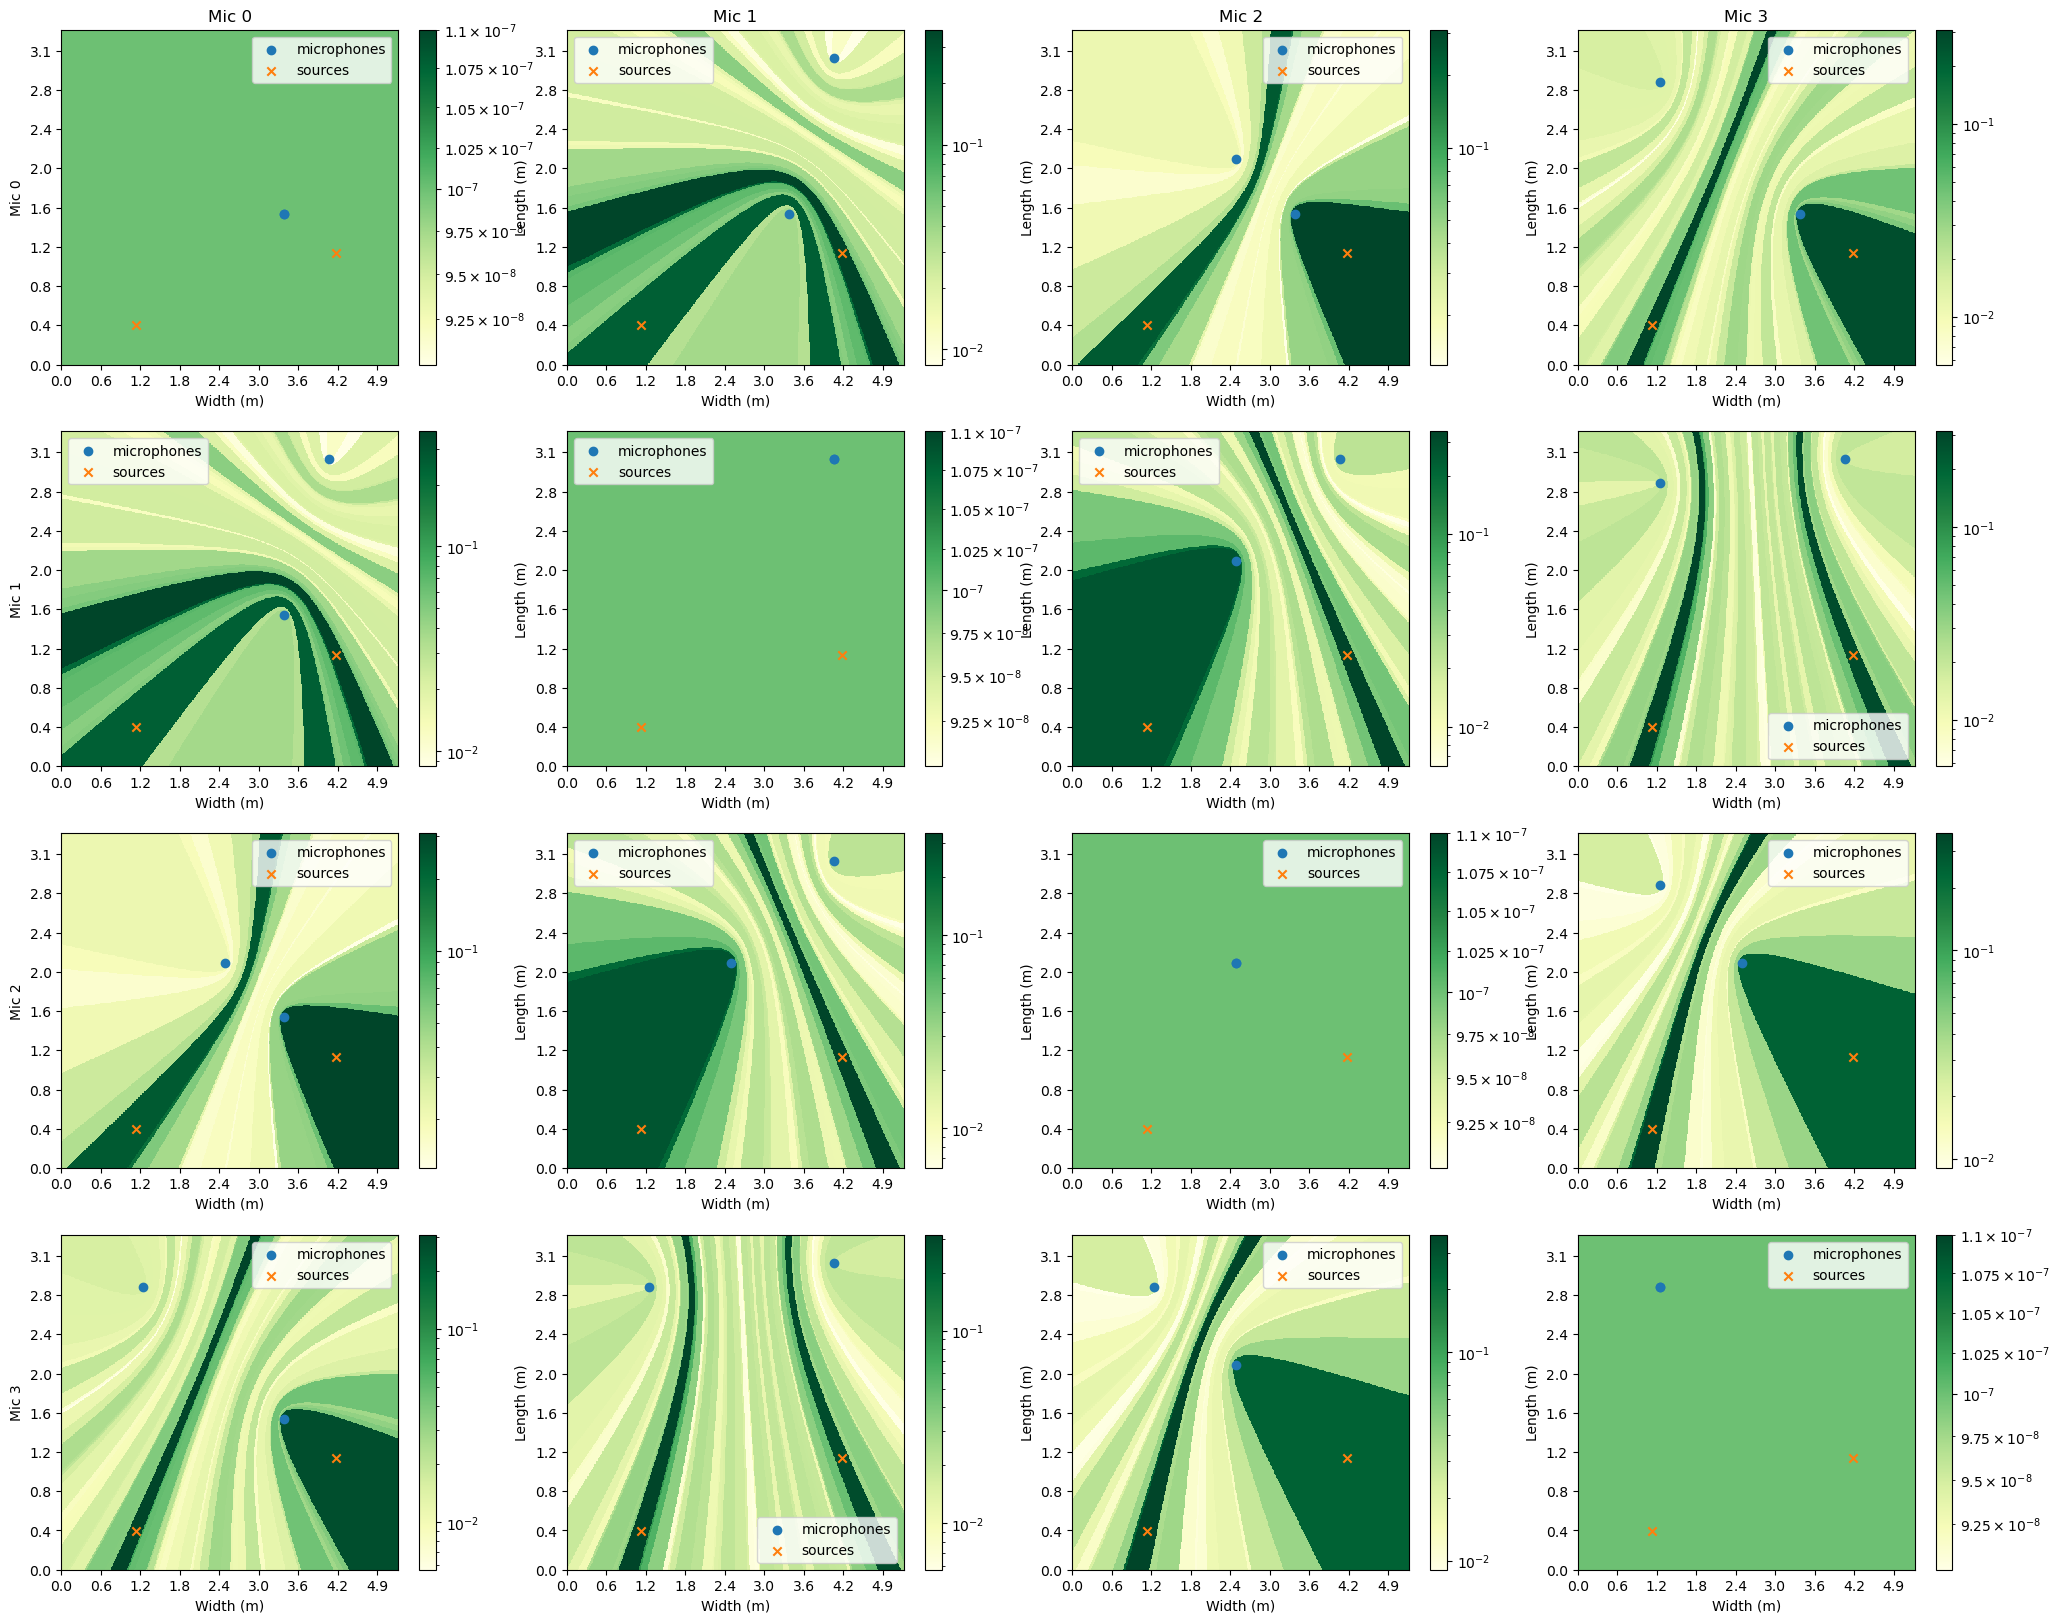

In [9]:
from pysoundloc.visualization import plot_grid, plot_square_grid
from pysoundloc.models import srp_phat

# Compute spatial likelihood functions for all microphones

mic_coords = metadata["mic_coordinates"][..., :2]
room_dims = metadata["room_dims"][..., :2]
source_coords = metadata["source_coordinates"][..., :2]

results = srp_phat(signal,
                   mic_coords,
                   room_dims.unsqueeze(0),
                   metadata["sr"], n_grid_points=512,
                   mode="max_correlation_neighbours",
                   gcc_mode="stft",
                   n_correlation_neighbours=10,
                   return_grid_pairs=True)

axs = plot_square_grid(results["grid"][0], room_dims,
                       mic_coords[0], source_coords, log=True)

## Compare SRP strategies

In [10]:
metadata["mic_coordinates"]

tensor([[[1.7724, 4.0036, 1.0000],
         [3.6069, 4.8106, 1.0000],
         [2.4105, 2.9497, 1.0000],
         [3.3242, 1.4737, 1.0000]]])

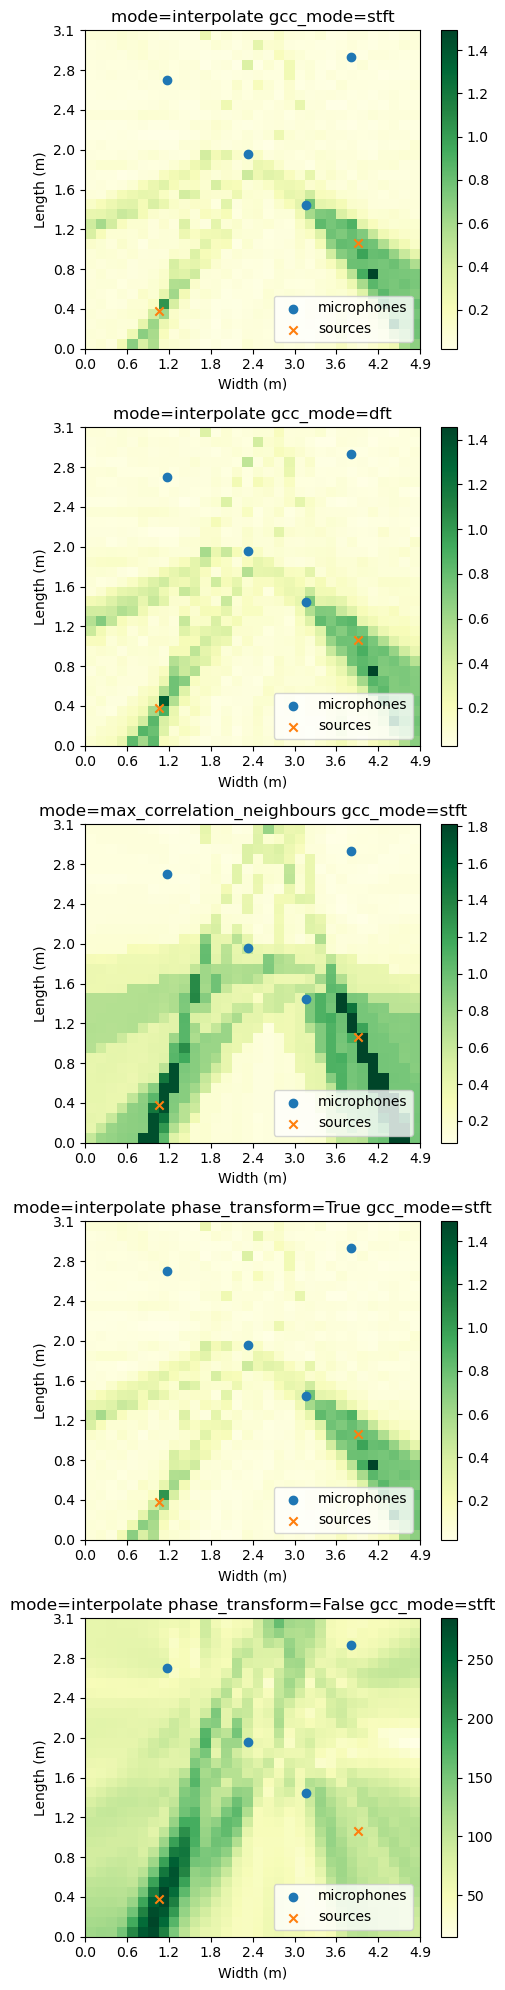

In [14]:
import matplotlib.pyplot as plt

from functools import reduce

N_GRID_POINTS = 32

test_cases = [
    {
        "mode": "interpolate",
        "gcc_mode": "stft"
    },
    {
        "mode": "interpolate",
        "gcc_mode": "dft"
    },
    {
        "mode": "max_correlation_neighbours",
        "gcc_mode": "stft"
    },
    {
        "mode": "interpolate",
        "phase_transform": True,
        "gcc_mode": "stft"
    },
    {
        "mode": "interpolate",
        "phase_transform": False,
        "gcc_mode": "stft"
    }
]


fig, axs = plt.subplots(nrows=len(test_cases), figsize=(5, 20))

grids = []
for i, test_case in enumerate(test_cases):
    grid = srp_phat(signal,
                    mic_coords,
                    room_dims.unsqueeze(0),
                    metadata["sr"], n_grid_points=N_GRID_POINTS,
                    **test_case)["grid"][0]

    title = [f"{k}={v}" for k, v in test_case.items()]
    title = reduce(lambda x, y: x + " " + y, title)
    
    axs[i].set_title(title)
    plot_grid(grid, room_dims, mic_coords[0], source_coords, log=False, ax=axs[i])
    
    grids.append(grid)

plt.tight_layout()

## 